<a href="https://colab.research.google.com/github/atalianb/BeePy3.0/blob/main/Intro_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Primero necesitamos los datos que utilizaremos y para ello vamos a usar la librería [datasets](https://github.com/huggingface/datasets/tree/main) que cuenta con distintos conjuntos de datos (especialmente para ML), los cuales puedes consultar en [este link](https://huggingface.co/datasets)



In [2]:
# install datasets
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# Importamos la librería
from datasets import list_datasets, load_dataset
from pprint import pprint

## Lista de los conjuntos de datos disponibles en la librería

In [4]:
# conjuntos de datos disponibles
datasets = list_datasets()

print(f"Actualmente hay {len(datasets)} conjuntos de datos disponibles:")
#Imprimimos los primeros 10
pprint(datasets[:10])# compact=True

Actualmente hay 35288 conjuntos de datos disponibles:
['acronym_identification',
 'ade_corpus_v2',
 'adversarial_qa',
 'aeslc',
 'afrikaans_ner_corpus',
 'ag_news',
 'ai2_arc',
 'air_dialogue',
 'ajgt_twitter_ar',
 'allegro_reviews']


In [5]:
#Atributos de los conjuntos de datos
acronym_dataset = list_datasets(with_details=True)[datasets.index('acronym_identification')]

pprint(acronym_dataset.__dict__)

{'_id': '621ffdd236468d709f181d58',
 'author': None,
 'cardData': {'annotations_creators': ['expert-generated'],
              'dataset_info': {'dataset_size': 9733236,
                               'download_size': 8556464,
                               'features': [{'dtype': 'string', 'name': 'id'},
                                            {'name': 'tokens',
                                             'sequence': 'string'},
                                            {'name': 'labels',
                                             'sequence': {'class_label': {'names': {'0': 'B-long',
                                                                                    '1': 'B-short',
                                                                                    '2': 'I-long',
                                                                                    '3': 'I-short',
                                                                                    '4': 'O'}}}}],
    

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_deprecation.py:229: FutureWarning: 'list_datasets' currently returns a list of objects but is planned to be a generator starting from version 0.14 in order to implement pagination. Please avoid to use `list_datasets(...).__getitem__` or explicitly convert the output to a list first with `list(iter(list_datasets)(...))`.
  warnings.warn(self._deprecation_msg.format(attr_name=attr_name), FutureWarning)


# En el primer ejemplo trabajaremos con el conjunto de datos del [Titanic](https://huggingface.co/datasets/mstz/titanic) 
( También pueden consultar esta página https://www.kaggle.com/competitions/titanic/overview)

In [6]:
dataset = list_datasets(with_details=True)[datasets.index('mstz/titanic')]#'mstz/bank'

pprint(dataset.__dict__)

{'_id': '642fdf4c43a53c86b3fb6d21',
 'author': 'mstz',
 'cardData': {'configs': ['survival'],
              'language': ['en'],
              'license': 'cc',
              'pretty_name': 'Titanic',
              'size_categories': ['n<1K'],
              'tags': ['titanic',
                       'tabular_classification',
                       'binary_classification'],
              'task_categories': ['tabular-classification']},
 'citation': None,
 'description': None,
 'disabled': False,
 'downloads': 13,
 'gated': False,
 'id': 'mstz/titanic',
 'lastModified': '2023-04-09T23:30:09.000Z',
 'likes': 0,
 'private': False,
 'sha': '8d2e7341082841e69c0d18a43267d8fc2406d2bc',
 'siblings': [],
 'tags': ['task_categories:tabular-classification',
          'size_categories:n<1K',
          'language:en',
          'license:cc',
          'titanic',
          'tabular_classification',
          'binary_classification']}


In [7]:
# Downloading and loading a dataset
dataset = load_dataset('mstz/titanic')['train']#('julien-c/titanic-survival')['train']#

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset titanic downloaded and prepared to /root/.cache/huggingface/datasets/mstz___titanic/survival/1.0.0/71fd17669f25732550778c36f61489b2684c9b062e0e83cd465060429ba73b06. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
#Veamos lo que hay dentro del conjunto de datos
dataset

Dataset({
    features: ['passenger_class', 'is_male', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'has_survived'],
    num_rows: 891
})

# Ahora usaremos [Pandas](https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html) una librería de python justamente para manipular datos

In [9]:
import pandas as pd
df = pd.DataFrame(dataset)
df

,passenger_class,is_male,age,sibsp,parch,ticket,fare,cabin,embarked,has_survived
0,3,True,22.0,1.0,0.0,'A/5 21171',7.2500,'',S,0
1,1,False,38.0,1.0,0.0,'PC 17599',71.2833,C85,C,1
2,3,False,26.0,0.0,0.0,'STON/O2. 3101282',7.9250,'',S,1
3,1,False,35.0,1.0,0.0,113803,53.1000,C123,S,1
4,3,True,35.0,0.0,0.0,373450,8.0500,'',S,0
...,...,...,...,...,...,...,...,...,...,...
886,2,True,27.0,0.0,0.0,211536,13.0000,'',S,0
887,1,False,19.0,0.0,0.0,112053,30.0000,B42,S,1
888,3,False,-1.0,1.0,2.0,'W./C. 6607',23.4500,'',S,0
889,1,True,26.0,0.0,0.0,111369,30.0000,C148,C,1


In [10]:
df.columns

Index(['passenger_class', 'is_male', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked', 'has_survived'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passenger_class  891 non-null    int64  
 1   is_male          891 non-null    bool   
 2   age              891 non-null    float64
 3   sibsp            891 non-null    float64
 4   parch            891 non-null    float64
 5   ticket           891 non-null    object 
 6   fare             891 non-null    float64
 7   cabin            891 non-null    object 
 8   embarked         891 non-null    object 
 9   has_survived     891 non-null    int64  
dtypes: bool(1), float64(4), int64(2), object(3)
memory usage: 63.6+ KB


* passenger_class: 1 = 1st, 2 = 2nd, 3 = 3rd
* is_male: self explanatory
* age: self explanatory
* sibsp = nr of sibilings / spouses abroad
* parch = nr of parents / children abroad
* ticket = self explanatory
* fare = passenger fare
* cabin = self explanatory
* embarked = port of embrarkation --> C = Chernourg, Q = Queenstown, S = Southhampton

In [12]:
(df.isnull() | df.empty | df.isna()).sum()

passenger_class    0
is_male            0
age                0
sibsp              0
parch              0
ticket             0
fare               0
cabin              0
embarked           0
has_survived       0
dtype: int64

<Axes: >

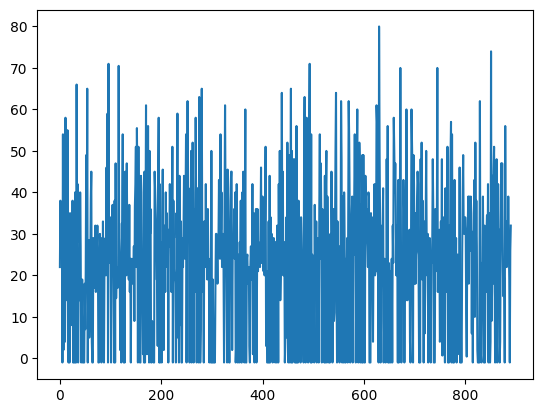

In [13]:
df['age'].plot()

In [14]:
min(df['age']),max(df['age'])

(-1.0, 80.0)

<Axes: >

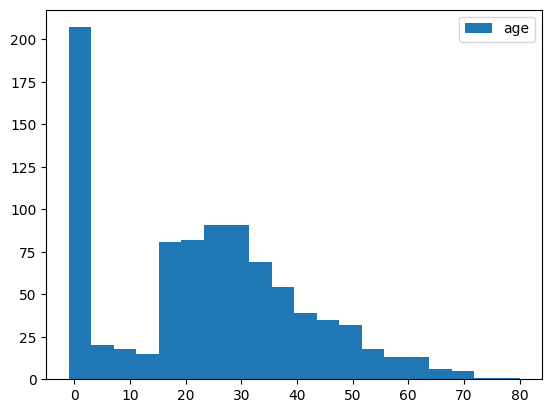

In [15]:
df.age.hist(grid=False,bins=20,legend=True)

In [16]:
sum_df = df['age'].sum()
mean_df = df['age'].mean()
median_df = df['age'].median()

print("Sum:",sum_df, "\nMean:", mean_df, "\nMedian:",median_df)

Sum: 21028.17 
Mean: 23.600639730639728 
Median: 24.0


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
style.use('seaborn-colorblind')

<ipython-input-17-1179ea273f9f>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn-colorblind')


Text(0.5, 1.0, 'Survived or not')

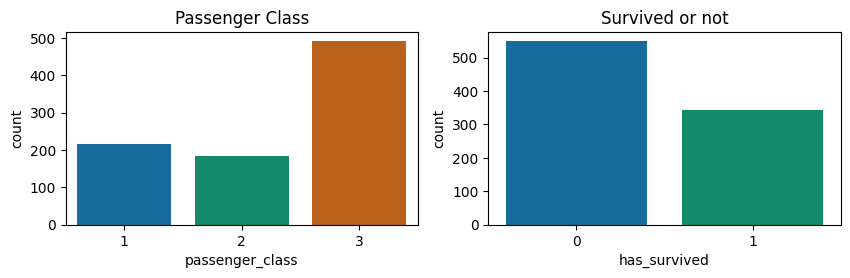

In [18]:
plt.figure(figsize=(10,2.5))

plt.subplot(121)
sns.countplot(x=df.passenger_class)#(x=df.Pclass)
plt.title("Passenger Class")

plt.subplot(122)
sns.countplot(x=df.has_survived)#(x=df.Survived)
plt.title("Survived or not")

In [19]:
df.passenger_class.value_counts()

3    491
1    216
2    184
Name: passenger_class, dtype: int64

<Axes: xlabel='passenger_class', ylabel='count'>

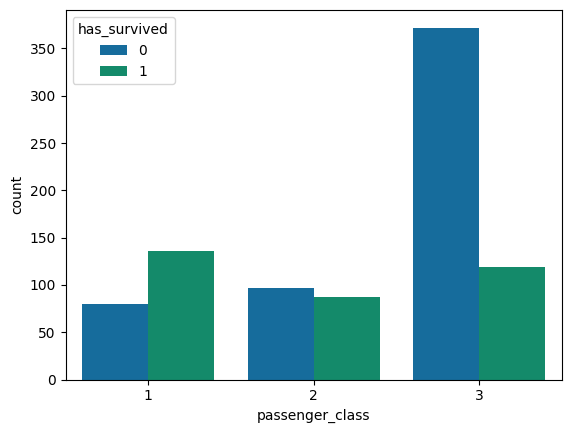

In [20]:
sns.countplot(data=df, x="passenger_class", hue="has_survived")

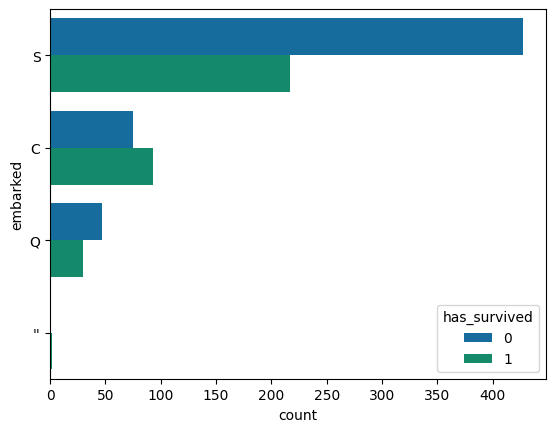

In [21]:
ax = sns.countplot(data=df, y="embarked", hue="has_survived")
sns.move_legend(ax,'lower right')

In [22]:
# Create a spreadsheet-style pivot table as a DataFrame.
#Los niveles en la tabla dinámica se almacenarán en objetos MultiIndex (índices jerárquicos) en el índice y las columnas del DataFrame de resultado.
PClass_survd = pd.pivot_table(df,index=['passenger_class'],columns=['has_survived'],aggfunc='size')
PClass_survd

has_survived,0,1
passenger_class,,
1,80,136
2,97,87
3,372,119


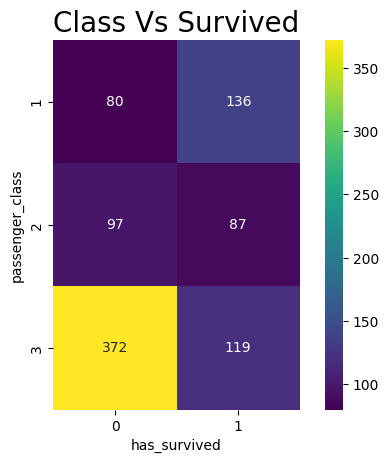

In [23]:
sns.heatmap(PClass_survd,annot=True, fmt='g',square=True,cmap='viridis')
plt.title('Class Vs Survived',fontsize=20)
plt.show()

In [24]:
df.corr(method='pearson')

<ipython-input-24-432dd9d4238b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


,passenger_class,is_male,age,sibsp,parch,fare,has_survived
passenger_class,1.000000,0.131900,-0.359728,0.083081,0.018443,-0.549500,-0.338481
is_male,0.131900,1.000000,0.023365,-0.114631,-0.245489,-0.182333,-0.543351
age,-0.359728,0.023365,1.000000,-0.182282,-0.045272,0.135707,0.012439
sibsp,0.083081,-0.114631,-0.182282,1.000000,0.414838,0.159651,-0.035322
parch,0.018443,-0.245489,-0.045272,0.414838,1.000000,0.216225,0.081629
fare,-0.549500,-0.182333,0.135707,0.159651,0.216225,1.000000,0.257307
has_survived,-0.338481,-0.543351,0.012439,-0.035322,0.081629,0.257307,1.000000


# ¿Qué podemos concluir de la figura anterior?
* 


# Ahora calcularemos $\chi^2$ para saber si existe un bias entre las columnas de la tabla  


In [25]:
pct_class = PClass_survd.sum(axis=1)/891
pct_class

passenger_class
1    0.242424
2    0.206510
3    0.551066
dtype: float64

In [26]:
pct_survived = PClass_survd.sum(axis=0)/891
pct_survived

has_survived
0    0.616162
1    0.383838
dtype: float64

# ¿Qué nos indican los porcentajes anteriores?


#Teniendo la hipótesis de que "sobevivir no depende de la clase en la que se viaja", esperariamos una proporción similar en las personas que sobrevivieron en todas las clases.

Así que, el resultado esperado sería el producto de los porcentajes y el total de pasajeres.

In [27]:
# These are the proportion of people expected with null hypothesis
pct_class.to_frame()@(pct_survived.to_frame().T) 

has_survived,0,1
passenger_class,,
1,0.149373,0.093052
2,0.127243,0.079266
3,0.339546,0.211520


In [28]:
# This is the number of people in all classes and survival history expected.
exp = round(pct_class.to_frame()@(pct_survived.to_frame().T)*891)
exp

has_survived,0,1
passenger_class,,
1,133.0,83.0
2,113.0,71.0
3,303.0,188.0


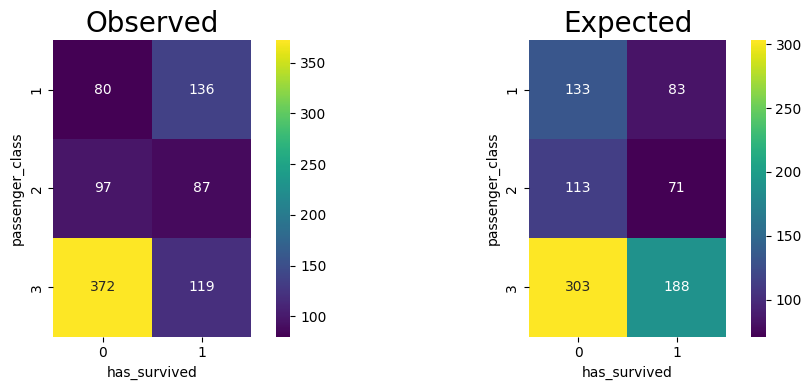

In [29]:
plt.figure(figsize=(10,4))

plt.subplot(121)
sns.heatmap(PClass_survd,annot=True, fmt='g',square=True,cmap='viridis')
plt.title('Observed',fontsize=20)

plt.subplot(122)
sns.heatmap(exp,annot=True, fmt='g',square=True,cmap='viridis')
plt.title('Expected',fontsize=20)
plt.tight_layout()

In [30]:
Chi_table = ((PClass_survd - exp)**2)/exp
Chi_table

has_survived,0,1
passenger_class,,
1,21.120301,33.843373
2,2.265487,3.605634
3,15.712871,25.324468


In [31]:
from scipy.stats.distributions import chi2

Chi_value = Chi_table.sum().sum()

p_value = chi2.sf(Chi_value,1)

print("Chi square value is ",Chi_value)
print("P value is",p_value)

Chi square value is  101.87213414657131
P value is 5.9223796800860216e-24


In [32]:
from scipy import stats
chi2_stat, p_val, dof, ex = stats.chi2_contingency(PClass_survd)

print("Chi square value is ",chi2_stat)
print("P value is",p_val)
print("Degrees of Freedom:",dof)

Chi square value is  102.88898875696056
P value is 4.549251711298793e-23
Degrees of Freedom: 2


# ¿Qué podemos observar?

(Sí la hipótesis nula no puede ser rechazada para alguna columna con el $\chi^{2}$, entonces el)



# Ahora, vamos a limpiar un poco los datos y haremos una regresión lineal

In [34]:
train_data = df.drop(['parch','ticket','cabin'],axis=1)

In [35]:
train_data.head()

,passenger_class,is_male,age,sibsp,fare,embarked,has_survived
0,3,True,22.0,1.0,7.2500,S,0
1,1,False,38.0,1.0,71.2833,C,1
2,3,False,26.0,0.0,7.9250,S,1
3,1,False,35.0,1.0,53.1000,S,1
4,3,True,35.0,0.0,8.0500,S,0


In [36]:
train_data['embarked'].replace('S', 0,inplace=True)
train_data['embarked'].replace('C', 1,inplace=True)
train_data['embarked'].replace('Q', 2,inplace=True)
train_data['is_male'].replace(True, 1,inplace=True)
train_data['is_male'].replace(False, 0,inplace=True)

In [37]:
train_data.head()

,passenger_class,is_male,age,sibsp,fare,embarked,has_survived
0,3,1,22.0,1.0,7.2500,0,0
1,1,0,38.0,1.0,71.2833,1,1
2,3,0,26.0,0.0,7.9250,0,1
3,1,0,35.0,1.0,53.1000,0,1
4,3,1,35.0,0.0,8.0500,0,0


In [38]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passenger_class  891 non-null    int64  
 1   is_male          891 non-null    int64  
 2   age              891 non-null    float64
 3   sibsp            891 non-null    float64
 4   fare             891 non-null    float64
 5   embarked         891 non-null    object 
 6   has_survived     891 non-null    int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 48.9+ KB


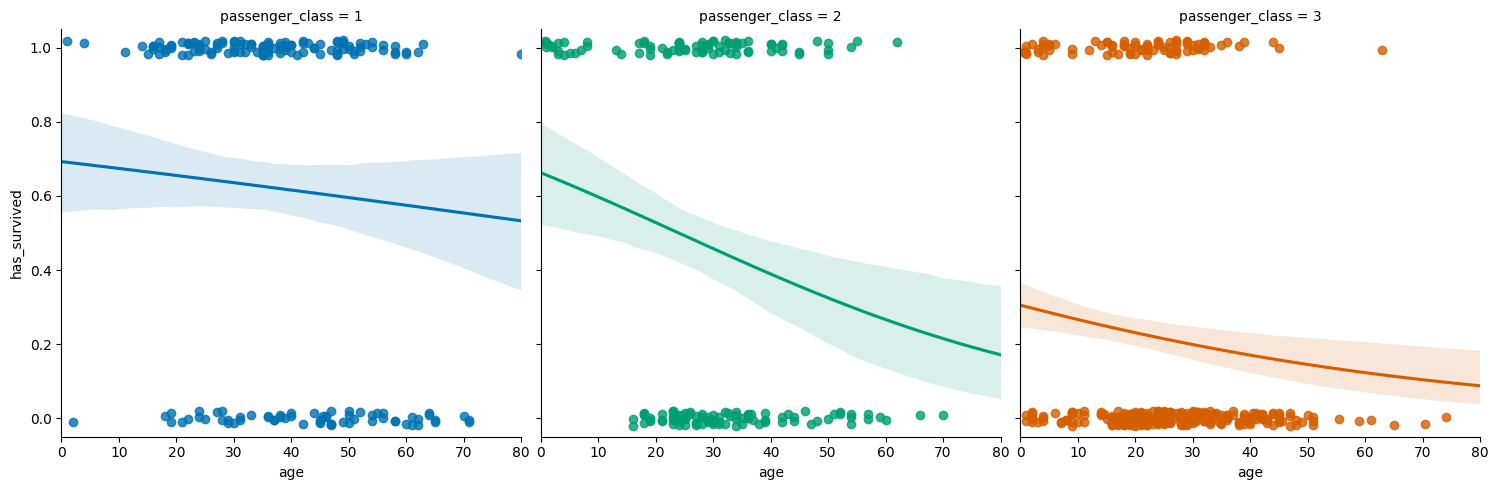

In [40]:
#pal = dict(male="#6495ED", female="#F08080")
# muenstra la probabilidad de sobrevivir como función de la edad y de la clase
g = sns.lmplot(x="age", y="has_survived", col="passenger_class", hue="passenger_class", data=df,
               y_jitter=.02, logistic=True, truncate=False)
g.set(xlim=(0, 80), ylim=(-.05, 1.05))

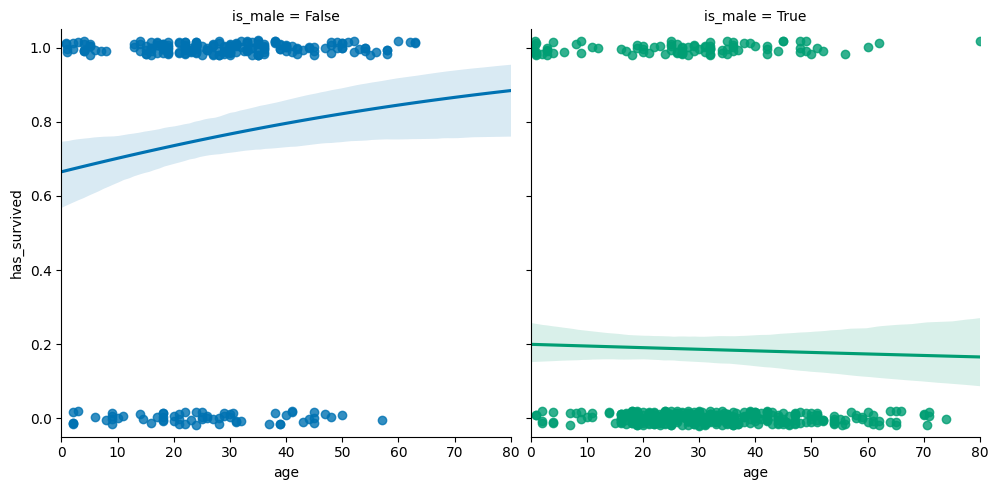

In [39]:
# Show the survival probability as a function of age and sex
g = sns.lmplot(x="age", y="has_survived", col="is_male", hue="is_male", data=df,
               y_jitter=.02, logistic=True, truncate=False)
g.set(xlim=(0, 80), ylim=(-.05, 1.05))

Nota: Seaborn también tiene el dataset del Titanic 

```
dfsns = sns.load_dataset("titanic")
```



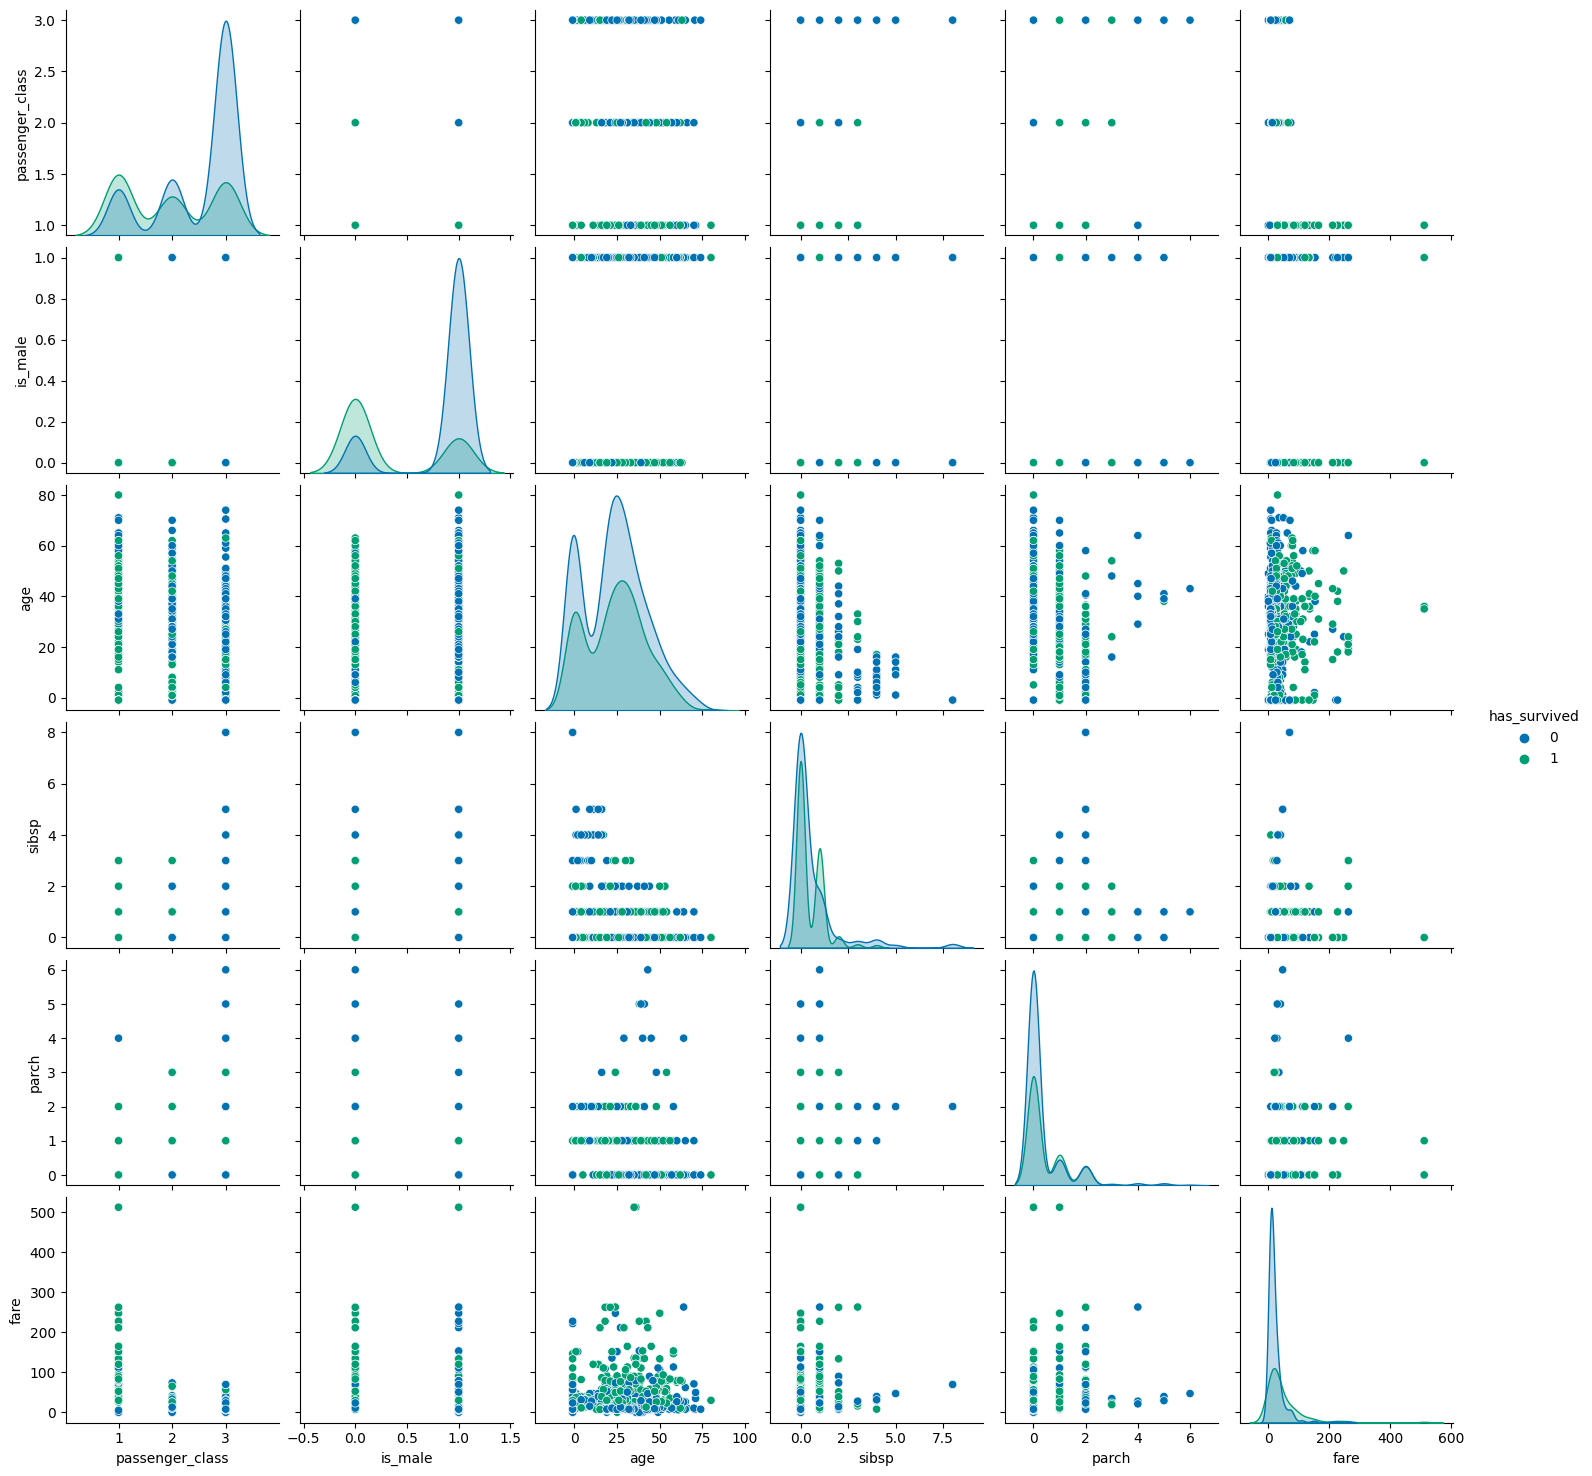

In [45]:
#Plot pairwise relationships in a dataset
g = sns.pairplot(df,hue="has_survived")

# Ejercicio:
Elige un dataset y exploralo. ¿Qué características importantes puedes notar?

#Links de interés
## Para empezar con SQL:


*   https://pandas.pydata.org/docs/getting_started/comparison/comparison_with_sql.html
*   https://towardsdatascience.com/query-pandas-dataframe-with-sql-2bb7a509793d

